First 5 rows of the dataset:


,pH,Nitrogen,Phosphorus,Potassium,Calcium,Magnesium,Iron,Zinc,Copper,Boron,Organic_Matter,Region,Deficiency,Caused_Disease
0,6.5,120,45,80,900,140,5.6,1.2,0.3,0.4,2.1,Himachal,NaN,NaN
1,6.8,100,35,70,700,120,4.6,1.0,0.2,0.3,1.8,Kashmir,NaN,NaN
2,7.0,80,25,60,600,100,4.0,0.9,0.2,0.2,1.5,Uttarakhand,Phosphorus Deficiency,Poor root development & reduced fruiting
3,5.9,70,20,55,550,90,3.5,0.7,0.1,0.1,1.3,Shimla,Nitrogen Deficiency,Chlorosis and poor leaf growth
4,6.2,130,50,90,950,160,6.1,1.3,0.3,0.4,2.3,Manali,NaN,NaN



Missing values per column:
pH                 0
Nitrogen           0
Phosphorus         0
Potassium          0
Calcium            0
Magnesium          0
Iron               0
Zinc               0
Copper             0
Boron              0
Organic_Matter     0
Region             0
Deficiency        41
Caused_Disease    41
dtype: int64

Dataset Summary Statistics:


,pH,Nitrogen,Phosphorus,Potassium,Calcium,Magnesium,Iron,Zinc,Copper,Boron,Organic_Matter
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000
mean,6.340000,90.600000,30.350000,63.400000,719.833333,109.483333,4.233333,0.831667,0.205000,0.236333,1.57500
std,0.327393,14.933979,8.081838,10.478711,127.870322,19.918045,0.789908,0.221888,0.055004,0.082564,0.32813
min,5.700000,60.000000,15.000000,40.000000,430.000000,70.000000,2.700000,0.400000,0.100000,0.100000,0.90000
25%,6.100000,80.000000,25.000000,57.250000,642.500000,97.250000,3.775000,0.700000,0.200000,0.200000,1.40000
50%,6.300000,89.500000,30.000000,65.000000,740.000000,110.000000,4.150000,0.800000,0.200000,0.250000,1.60000
75%,6.525000,100.000000,36.250000,70.000000,820.000000,125.000000,4.825000,1.000000,0.200000,0.300000,1.80000
max,7.100000,130.000000,50.000000,90.000000,950.000000,160.000000,6.100000,1.300000,0.300000,0.400000,2.30000


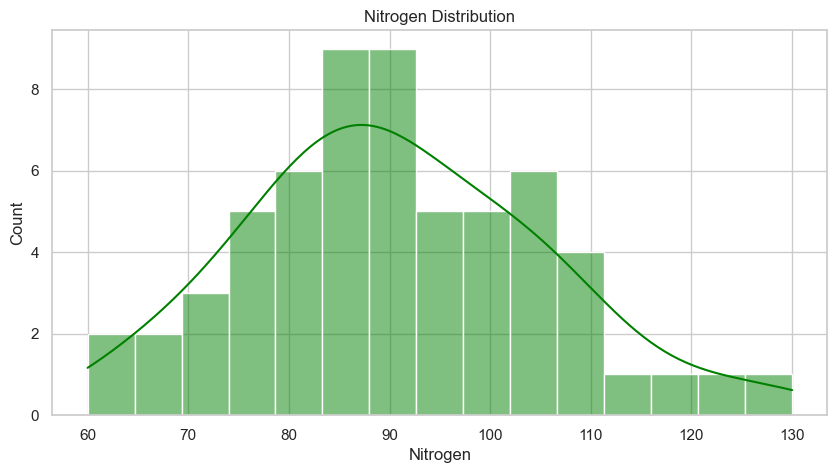

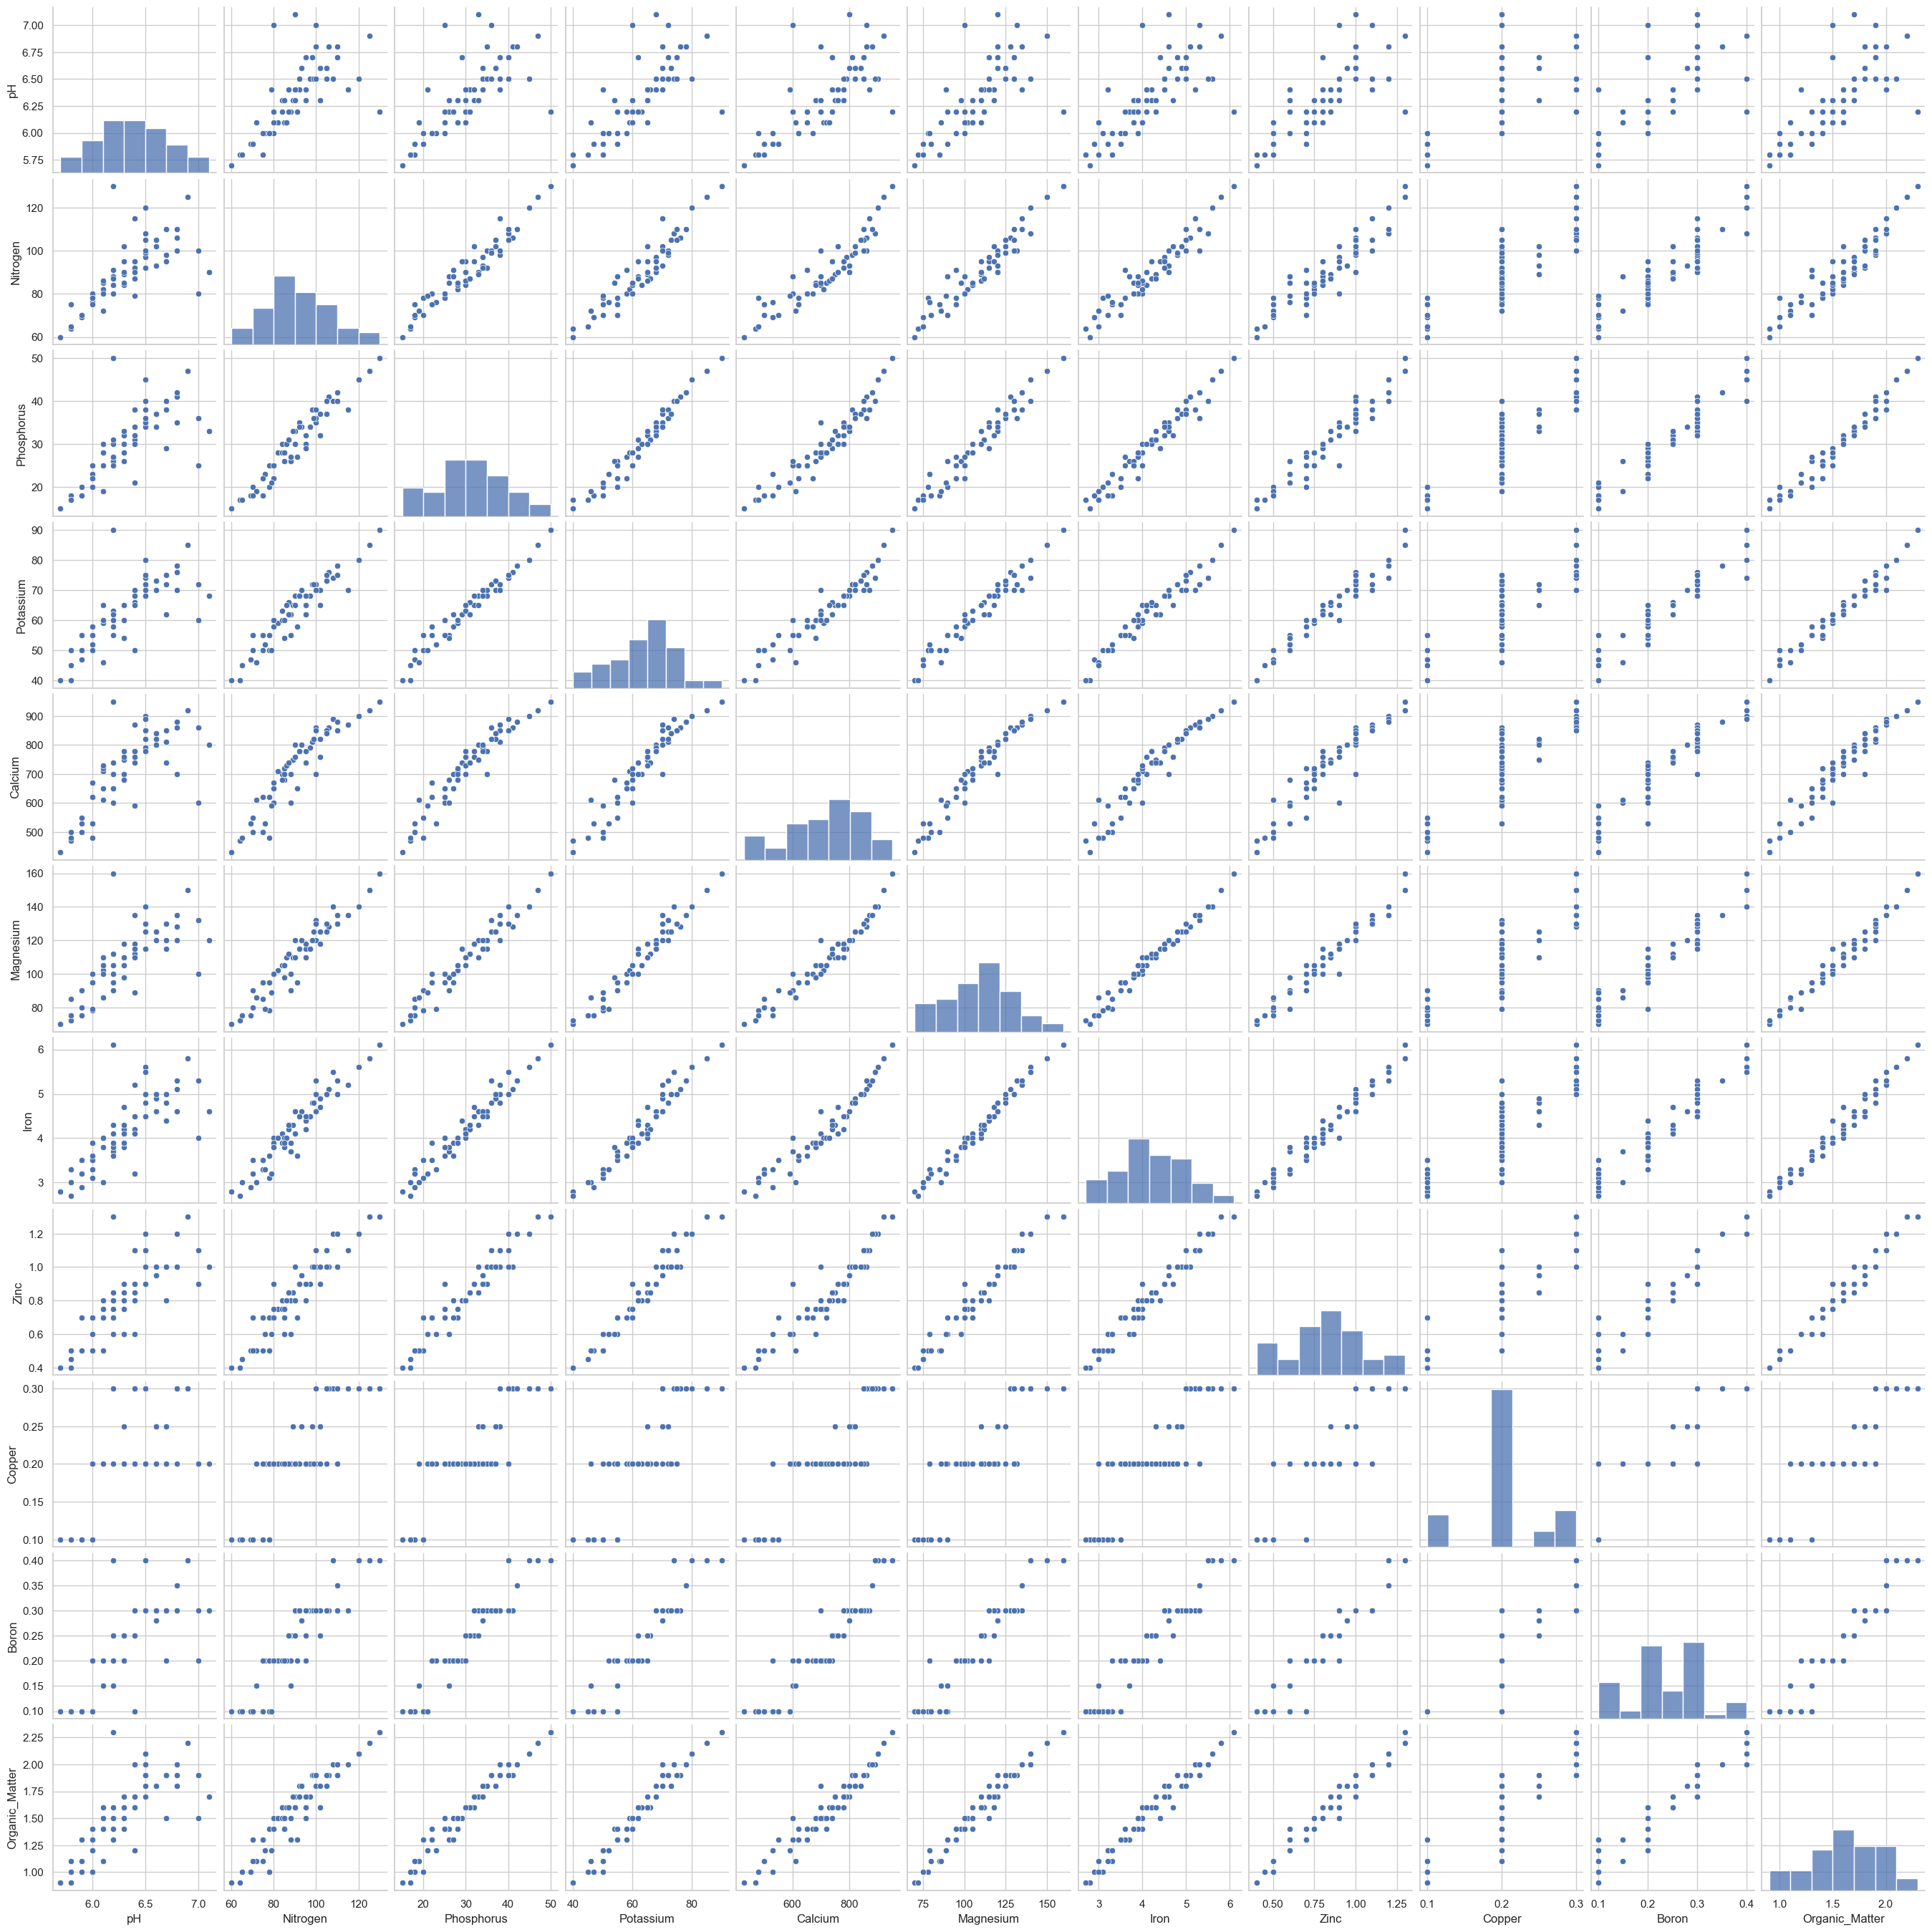


Classification Report:
                     precision    recall  f1-score   support

 Calcium Deficiency       0.00      0.00      0.00         1
Nitrogen Deficiency       0.00      0.00      0.00         1
               None       0.91      1.00      0.95        10

           accuracy                           0.83        12
          macro avg       0.30      0.33      0.32        12
       weighted avg       0.76      0.83      0.79        12


Confusion Matrix:


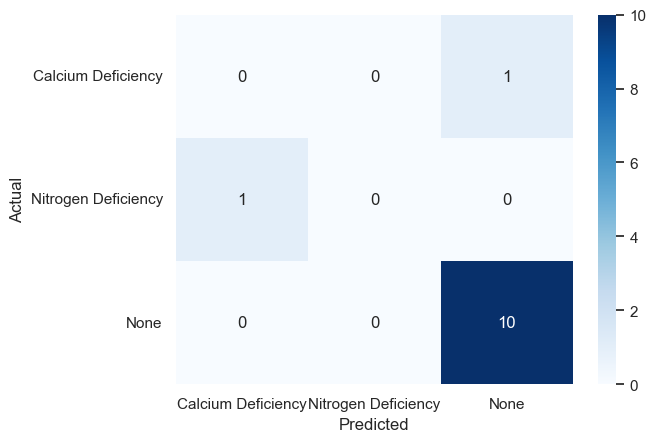

Accuracy Score: 0.8333333333333334

Predicted Deficiency for the new sample: None
Model and encoders saved successfully in 'model/' folder.


C:\Users\Anshika\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# --------------------------
# Soil Analysis and Deficiency Prediction Notebook
# --------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
import joblib
import os

# --------------------------
# 2. Load Dataset
# --------------------------
df = pd.read_csv("../data/dataset.csv")  # replace with your CSV path
print("First 5 rows of the dataset:")
display(df.head())

# --------------------------
# 3. Check for missing values
# --------------------------
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing Deficiency and Caused_Disease values with 'None'
df['Deficiency'] = df['Deficiency'].fillna('None')
df['Caused_Disease'] = df['Caused_Disease'].fillna('None')

# --------------------------
# 4. Summary Statistics
# --------------------------
print("\nDataset Summary Statistics:")
display(df.describe())

# --------------------------
# 5. Visualizations
# --------------------------
sns.set(style="whitegrid")

# Distribution of Nitrogen
plt.figure(figsize=(10,5))
sns.histplot(df['Nitrogen'], kde=True, bins=15, color='green')
plt.title('Nitrogen Distribution')
plt.show()

# Pairplot of nutrients
nutrients = ['pH','Nitrogen','Phosphorus','Potassium','Calcium','Magnesium',
             'Iron','Zinc','Copper','Boron','Organic_Matter']
sns.pairplot(df[nutrients])
plt.show()

# --------------------------
# 6. Encode categorical columns
# --------------------------
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])

le_deficiency = LabelEncoder()
df['Deficiency_encoded'] = le_deficiency.fit_transform(df['Deficiency'])

# --------------------------
# 7. Prepare features and target
# --------------------------
X = df[nutrients + ['Region_encoded']]
y = df['Deficiency_encoded']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# 8. Train Random Forest Classifier
# --------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# --------------------------
# 9. Predictions
# --------------------------
y_pred = rf_model.predict(X_test_scaled)

# --------------------------
# 10. Evaluation
# --------------------------
# Only use labels present in y_test or y_pred
labels_present = unique_labels(y_test, y_pred)
target_names = le_deficiency.inverse_transform(labels_present)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels_present, target_names=target_names, zero_division=0))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# --------------------------
# 11. Example: Predict deficiency for a new soil sample
# --------------------------
new_sample = np.array([[6.3, 90, 30, 60, 700, 100, 4.0, 0.7, 0.2, 0.2, 1.5, le_region.transform(['Himachal'])[0]]])
new_sample_scaled = scaler.transform(new_sample)
predicted_deficiency = le_deficiency.inverse_transform(rf_model.predict(new_sample_scaled))
print("\nPredicted Deficiency for the new sample:", predicted_deficiency[0])

# --------------------------
# 12. Save the trained model, encoders, and scaler for Flask app
# --------------------------
if not os.path.exists("model"):
    os.makedirs("model")

joblib.dump(rf_model, "model/trained_model.pkl")
joblib.dump(le_deficiency, "model/label_encoder.pkl")
joblib.dump(le_region, "model/region_encoder.pkl")
joblib.dump(scaler, "model/scaler.pkl")

print("Model and encoders saved successfully in 'model/' folder.")
